In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
X=df.drop('label', axis=1)

In [10]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [11]:
y=df['label']

In [12]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, HashingVectorizer

In [14]:
df.shape

(20800, 5)

In [15]:
df=df.dropna()

In [16]:
df.shape

(18285, 5)

In [18]:
messages=df.copy()

In [24]:
pd.set_option('display.max_rows', 20799)

In [28]:
messages.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [33]:
messages.reset_index(inplace=True)

In [34]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [35]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [37]:
messages.drop(['index','id'], axis=1, inplace=True)

In [38]:
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
ps=PorterStemmer()

In [39]:
corpus=[]
for i in range(0,len(messsages)):
    review=re.sub(r'[^a-zA-Z]',' ', messsages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [19]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000, ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [41]:
X.shape

(18285, 5000)

In [42]:
y=messsages['label']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [46]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [47]:
count_df=pd.DataFrame(X_train, columns=cv.get_feature_names())

In [48]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
import matplotlib.pyplot as plt

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultiNomial NaiveBayes 

In [51]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [52]:
from sklearn import metrics
import numpy as np
import itertools

accuracy: 0.892
Confusion matrix, without normalization


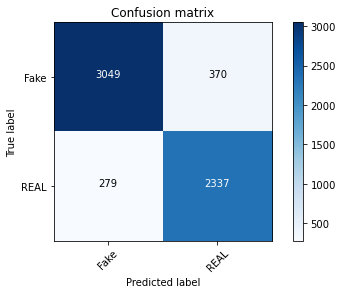

In [53]:
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print('accuracy: %0.3f' %score)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes=['Fake','REAL'])

# Passive Agressive Classifier Algorithm

In [54]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [56]:
linear_clf=PassiveAggressiveClassifier(n_iter_no_change=50)

In [57]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier(n_iter_no_change=50)

In [58]:
pred=linear_clf.predict(X_test)

In [59]:
score=metrics.accuracy_score(y_test,pred)

In [60]:
score

0.9108533554266777

In [62]:
print('Score %.3f'% score)

Score 0.911


In [63]:
cm=metrics.confusion_matrix(y_test,pred)

Confusion matrix, without normalization


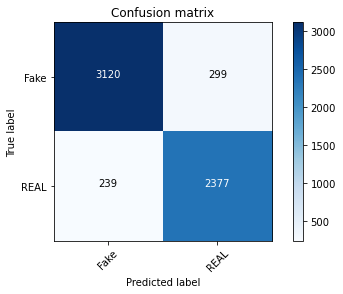

In [64]:
plot_confusion_matrix(cm, classes=['Fake','REAL'])

In [65]:
cm

array([[3120,  299],
       [ 239, 2377]], dtype=int64)

# MultiNomial Classifier With HyperParameter

In [66]:
classifier=MultinomialNB(alpha=0.1)

In [67]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score=metrics.accuracy_score(y_test,pred)
    if score>previous_score:
        classifier=sub_classifier
    print('Alpha: {}, Score: {}'.format(alpha,score))

C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score: 0.9108533554266777
Alpha: 0.1, Score: 0.9108533554266777
Alpha: 0.2, Score: 0.9108533554266777
Alpha: 0.30000000000000004, Score: 0.9108533554266777
Alpha: 0.4, Score: 0.9108533554266777
Alpha: 0.5, Score: 0.9108533554266777
Alpha: 0.6000000000000001, Score: 0.9108533554266777
Alpha: 0.7000000000000001, Score: 0.9108533554266777
Alpha: 0.8, Score: 0.9108533554266777
Alpha: 0.9, Score: 0.9108533554266777


In [68]:
feature_names=cv.get_params()

In [69]:
feature_names

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [70]:
classifier.coef_[0]

array([ -9.10667909,  -8.62905154,  -9.10667909, ..., -10.80127481,
        -8.76439289,  -9.33493774])

In [72]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-7.756752375122301, 'input'),
 (-8.219375897070414, 'vocabulary'),
 (-8.307151507952799, 'stop_words'),
 (-8.629051537714922, 'min_df'),
 (-8.629051537714922, 'binary'),
 (-8.764392885584684, 'max_df'),
 (-9.106679092071317, 'preprocessor'),
 (-9.106679092071317, 'decode_error'),
 (-9.106679092071317, 'analyzer'),
 (-9.334937744052297, 'ngram_range'),
 (-9.63120356019547, 'lowercase'),
 (-9.63120356019547, 'dtype'),
 (-10.054060411015502, 'tokenizer'),
 (-10.054060411015502, 'encoding'),
 (-10.801274812845724, 'token_pattern'),
 (-10.801274812845724, 'strip_accents'),
 (-10.801274812845724, 'max_features')]